# GBM Examples Notebook
This notebook demonstrates MAE plots and comparisons for GBM samplers. 

In [78]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

import config as cf
import averaged_mae as am
import plot_util as pu

## Configuration
Toggle debugging for the demo.

In [2]:
cf.is_debug = False

Standardize figure size across the notebook (width, height) in inches:

In [3]:
FIGSIZE = (6, 4)
plt.rcParams['figure.figsize'] = FIGSIZE

## MAE vs Number of Paths in QMCPy and QuantLib

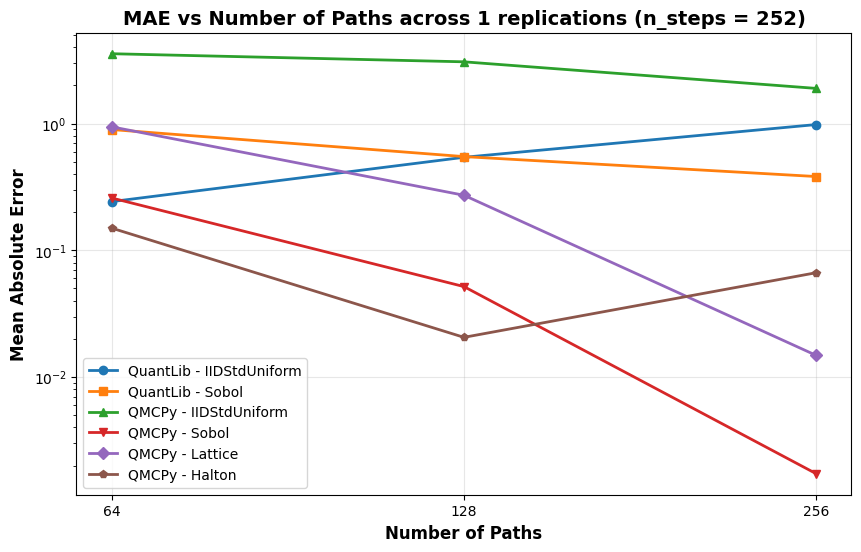

In [10]:
cf.is_debug = True
replications = 1
am.plot_mae_vs_paths(replications)

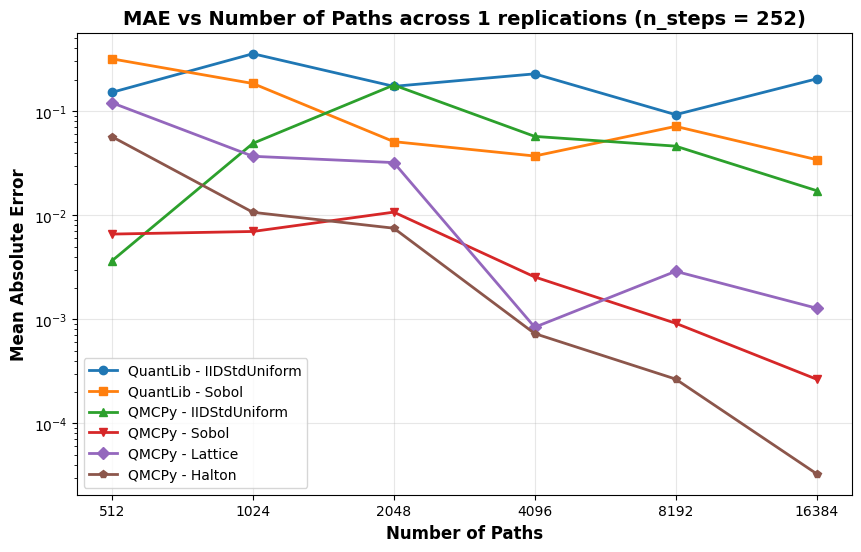

In [11]:
cf.is_debug = False
replications = 1
am.plot_mae_vs_paths(replications)

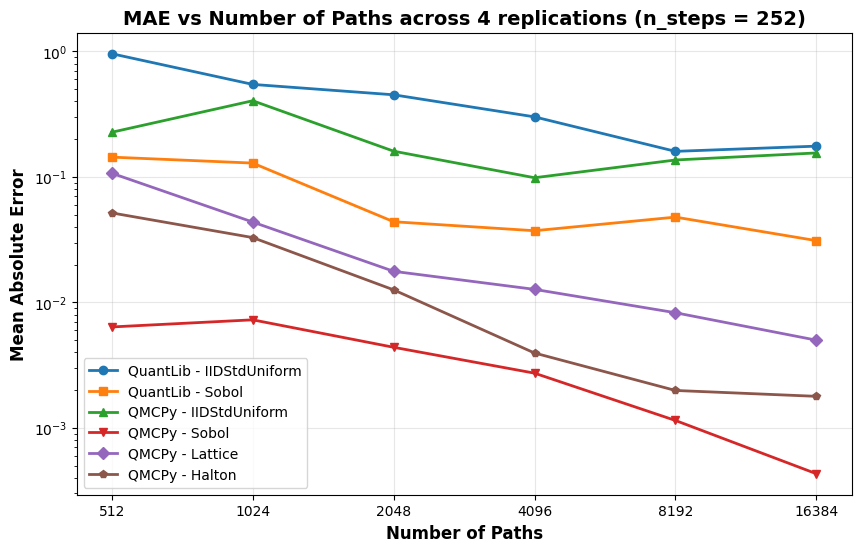

In [104]:
replications = 4
am.plot_mae_vs_paths(replications)

## MAE vs Number of Time Steps in QMCPy and QuantLib

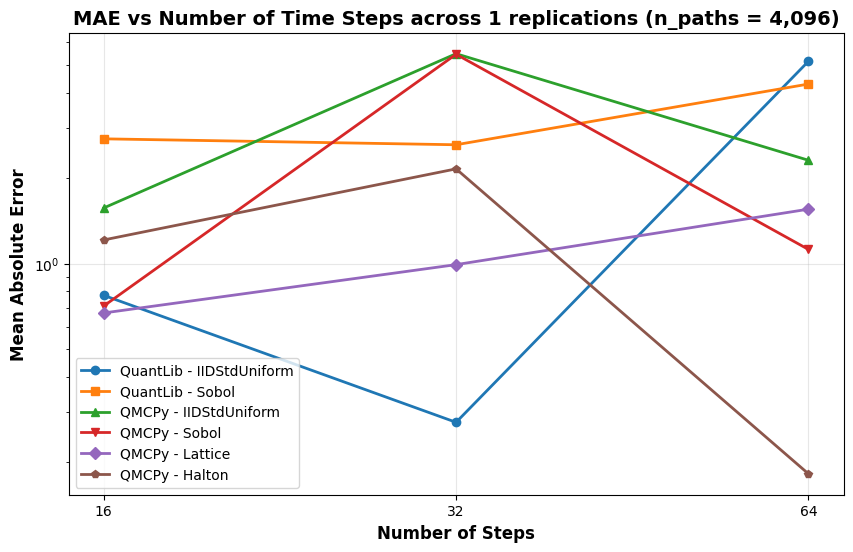

In [52]:
cf.is_debug = True
replications = 1
am.plot_mae_vs_steps(replications)

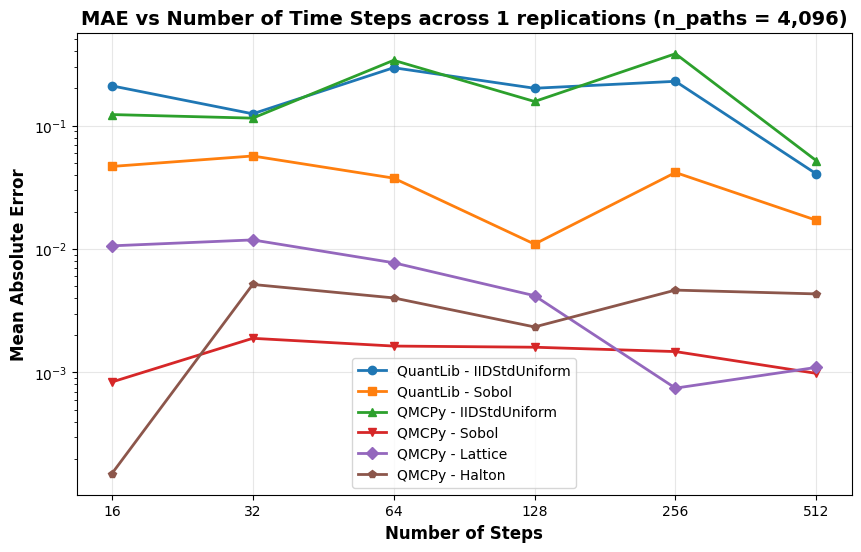

In [105]:
cf.is_debug = False
replications = 1
am.plot_mae_vs_steps(replications)

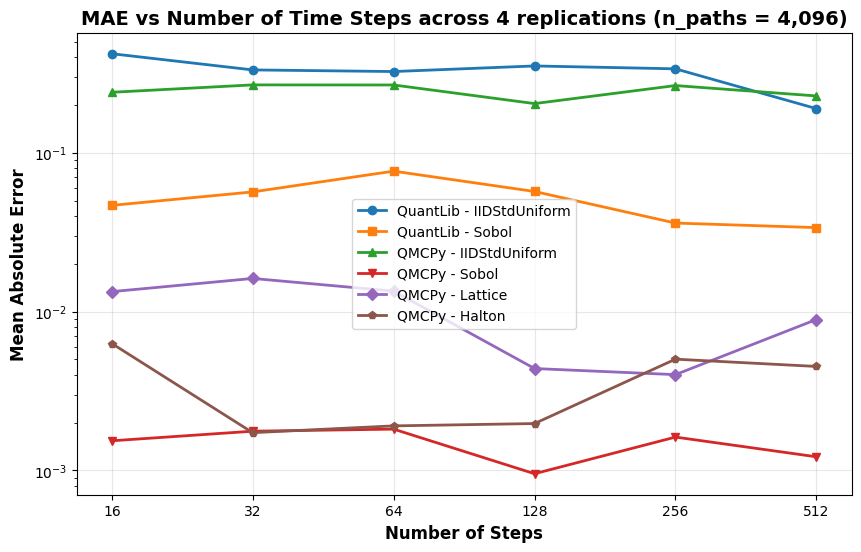

In [103]:
cf.is_debug = False
replications = 4
am.plot_mae_vs_steps(replications)